# I Solving the Sum of Two Digits Programming Challenge

## C++

In [ ]:
%%writefile sum.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Writing sum.cpp


In [ ]:
!g++ sum.cpp -o sum
!./sum

5 9
14

### Test input output files

In [ ]:
%%writefile input1.txt
4 8

Writing input1.txt


In [ ]:
%%writefile output1.txt
12

Overwriting output1.txt


In [ ]:
%%writefile input2.txt
-5 9

Overwriting input2.txt


In [ ]:
%%writefile output2.txt
4

Overwriting output2.txt


In [ ]:
!./sum < input1.txt

12

In [ ]:
!./sum < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt 

In [ ]:
!grep -xvFf output1.txt output2.txt 

4


In [ ]:
!grep -xvFf output2.txt output1.txt 

12


In [ ]:
!./sum < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
!./sum < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [ ]:
%%writefile sum.py
# python3


def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Writing sum.py


In [ ]:
!python sum.py

4 7
11


In [ ]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [ ]:
%%writefile max_pairwise_product1.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Overwriting maxpairwise1.cpp


In [ ]:
!g++ max_pairwise_product1.cpp -o max_pairwise_product1
!./max_pairwise_product1

5
1 3 2 3 2
9


### Test 1: lagest input numbers 10000 10000 in the input

In [ ]:
%%writefile input1.txt
10
1 3 100000 9 100000 23

Overwriting input1.txt


In [ ]:
!./max_pairwise_product1 < input1.txt

1410065408


In [ ]:
%%writefile max_pairwise_product2.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Overwriting max_pairwise_product2.cpp


In [ ]:
!g++ max_pairwise_product2.cpp -o max_pairwise_product2
!./max_pairwise_product2 < input1.txt

10000000000


### Test 2  generate a tests file with the maximun n 100000 numbres and measure time

In [ ]:
%%writefile randomgen.cpp
#include <stdlib.h>
#include <stdio.h>
#include <iostream>
#include <cstdlib>
#include <ctime>
#include <fstream>

using namespace std;

int main(){
  
    srand((unsigned) time(0));
    int randomNumber;

    ofstream random;
    random.open ("numbers.txt");
      
      
    
    for(int i = 0; i < 200000;i++){
      randomNumber = (rand() % 7637029) + 1;
      random << randomNumber << endl;
    }

    random.close();
}

Overwriting randomgen.cpp


In [ ]:
!g++ randomgen.cpp -o randomgen
!./randomgen

### Efficient solution 

In [ ]:
%%writefile eficientAlgorithm.cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <stdlib.h>
#include <stdio.h>
#include <iostream>
#include <cstdlib>
#include <fstream>

using namespace std;



int main(){
    
    long long numbers[200000];

    ifstream inFile;

    inFile.open("numbers.txt");
  
    string line;
    
    long long a = 0, b = 0;
    int iteration;

    for(int i = 0; i < 200000; i++){
        getline(inFile, line);
        long long number;
        number = stoll(line);
        if(number > a){
            a = number;
            iteration = i;
        }
    }

    inFile.close();

    inFile.open("numbers.txt");
  
    string line2;

    for(int i = 0; i < 200000; i++){
        getline(inFile, line2);
        long long number;
        number = stoll(line2);
        if(number > b && iteration != i){
            b = number;
        }
    }

    inFile.close();
 
  
    cout << "Max product numbers: " << a << ","
         << b << endl;

    cout << "Product: " << a*b;


    

}

Overwriting eficientAlgorithm.cpp


In [ ]:
!g++  eficientAlgorithm.cpp -o eficientAlgorithm


Stress tests 

Read 200.000 numbers, find max 

In [ ]:
!./eficientAlgorithm

Max product numbers: 7637014,7636993
Product: 58323822458902

## Python

In [ ]:
a = 0; b = 0; iteration = 0;

f = open("numbers.txt", "r")

for i in range(0,200000):
  number = int(f.readline())
  if number > a:
    a = number;

f.close()

f = open("numbers.txt", "r")

for i in range(0,200000):
  number = int(f.readline())
  if number > b and iteration != i:
    b = number;    

f.close()

print("Max product numbers: {", a, ",", b, "}",sep = "")
print(a*b)

Max product numbers: {7637014,7637014}
58323982836196


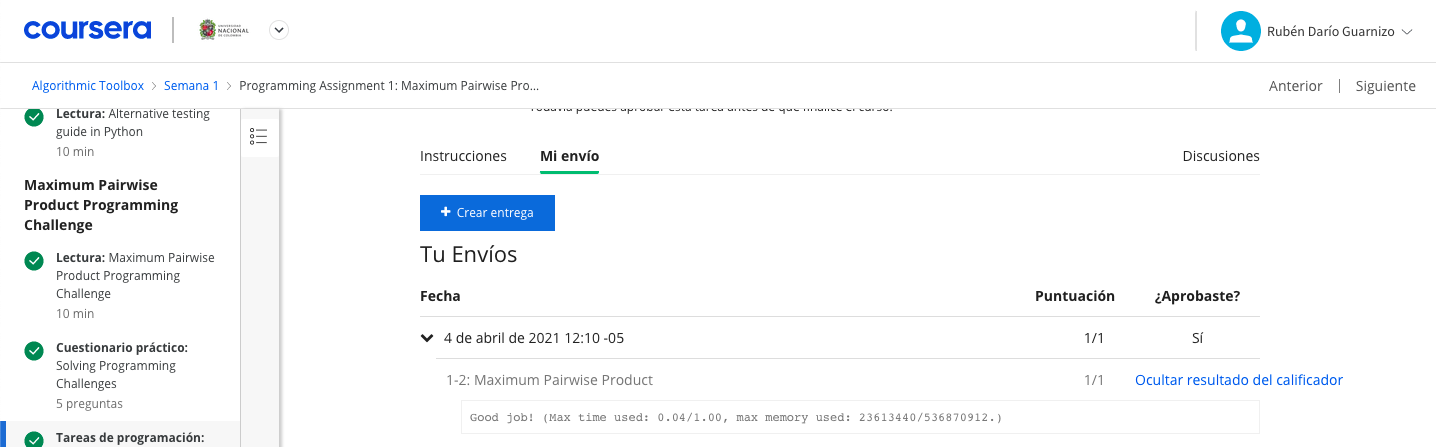